In [1]:
import rastereasy

# Crop image based on pixel coordinates

Two options for applying crop
- Do not crop the image but returns a cropped image (function `crop` with default option )
- Crop the image directly (function `crop` with option `inplace=True`)

Two options for cropping
- With respect to pixel coordinates
- With respect to lat/lon coordinates



## 1) Read and plot image

<Figure size 640x480 with 0 Axes>

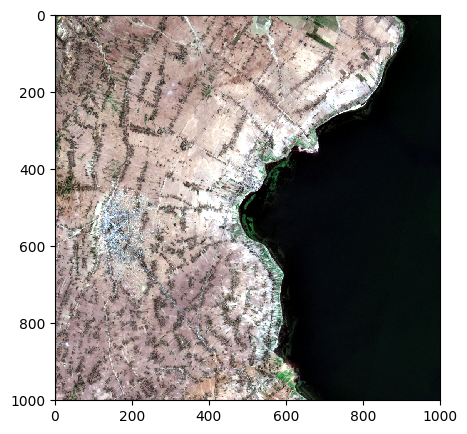

In [2]:
name_im='./data/demo/sentinel.tif'
image=rastereasy.Geoimage(name_im,history=True)
image.colorcomp(['4','3','2'],extent="pixel")

In [3]:
help(image.crop)

Help on method crop in module rastereasy.rastereasy:

crop(
    deb_row_lon,
    end_row_lon,
    deb_col_lat,
    end_col_lat,
    dest_name=None,
    pixel=True,
    inplace=False
) method of rastereasy.rastereasy.Geoimage instance
    Crop the image to a specified extent in-place.

    This method extracts a rectangular subset of the image, defined either by pixel
    coordinates or by geographic coordinates, and updates the current image to contain
    only the cropped region.

    Parameters
    ----------
    deb_row_lon : int or float
        Starting position:
        - If pixel=True: Starting row (y) coordinate
        - If pixel=False: Starting longitude coordinate

    end_row_lon : int or float
        Ending position:
        - If pixel=True: Ending row (y) coordinate
        - If pixel=False: Ending longitude coordinate

    deb_col_lat : int or float
        Starting position:
        - If pixel=True: Starting column (x) coordinate
        - If pixel=False: Starting lati

## 2) Cropping by returning a new image

### 2) a) With respect to pixel coordinates


Before crop
- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 12
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12}

--- History of modifications---
[2025-06-04 15:23:49] - Read image ./data/demo/sentinel.tif




<Figure size 640x480 with 0 Axes>

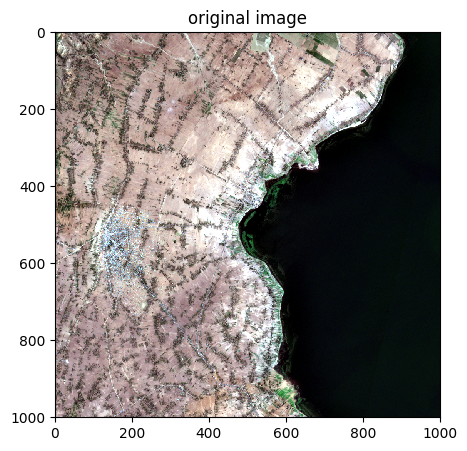

After crop
- Size of the image:
   - Rows (height): 150
   - Cols (width): 200
   - Bands: 12
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.07488251, 38.36338418)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12}

--- History of modifications---
[2025-06-04 15:23:50] - Created image from data array
[2025-06-04 15:23:50] - Created by cropping from pixel coordinates rows 50-200, cols 100-300
	 Saved to: ./data/results/crop/crop_pixel1.tif




<Figure size 640x480 with 0 Axes>

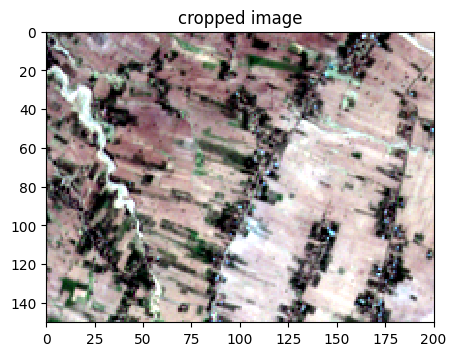

In [4]:
deb_row=50
deb_col=100
end_row = 200
end_col=300

print('Before crop')
image.info()
image.colorcomp([4,3,2],title='original image',extent="pixel")
image_crop = image.crop(deb_row,end_row,deb_col,end_col,dest_name='./data/results/crop/crop_pixel1.tif')
print('After crop')
image_crop.info()
image_crop.colorcomp([4,3,2],title='cropped image',extent="pixel")

### 2) b) With respect to lat/lon coordinates


Get information of lon / lat bos

In [5]:
print('latitude - longitude of top left corner', image.pixel2latlon(0,0))
print('latitude - longitude of bottom right corner', image.pixel2latlon(image.shape[0],image.shape[1]))
# Transform the coordinates pixels in lat,lon
deb_row=50
deb_col=100
end_row = 200
end_col=300
lat1,lon1=image.pixel2latlon(deb_row,deb_col)
lat2,lon2=image.pixel2latlon(end_row,end_col)
print('lat,lon corresponding to (%d,%d) : (%f,%f)'%(deb_row,deb_col,lat1,lon1))
print('lat,lon corresponding to (%d,%d) : (%f,%f)'%(end_row,end_col,lat2,lon2))


latitude - longitude of top left corner (7.086164175158828, 38.34525905140625)
latitude - longitude of bottom right corner (6.99582780410311, 38.4359177538106)
lat,lon corresponding to (50,100) : (7.081654,38.354320)
lat,lon corresponding to (200,300) : (7.068111,38.372448)


<Figure size 640x480 with 0 Axes>

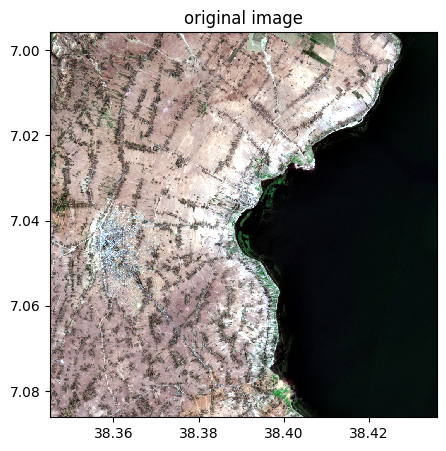

After crop
- Size of the image:
   - Rows (height): 150
   - Cols (width): 200
   - Bands: 12
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.07488251, 38.36338418)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12}

--- History of modifications---
[2025-06-04 15:23:50] - Created image from data array
[2025-06-04 15:23:50] - Created by cropping from geographic coordinates lon 38.35432021446677-38.37244815225719, lat 7.081654161856243-7.068110860101535




<Figure size 640x480 with 0 Axes>

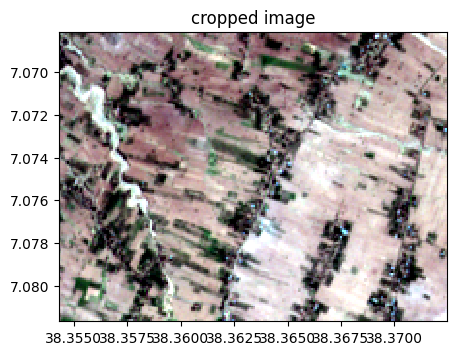

In [6]:

image.colorcomp([4,3,2],title='original image')
image_cropped=image.crop(lon1,lon2,lat1,lat2,pixel=False)
print('After crop')
image_cropped.info()
image_cropped.colorcomp([4,3,2],title='cropped image')



## 3) Cropping with `inplace=True` (modify the image directly)


In [7]:
help(image.crop)

Help on method crop in module rastereasy.rastereasy:

crop(
    deb_row_lon,
    end_row_lon,
    deb_col_lat,
    end_col_lat,
    dest_name=None,
    pixel=True,
    inplace=False
) method of rastereasy.rastereasy.Geoimage instance
    Crop the image to a specified extent in-place.

    This method extracts a rectangular subset of the image, defined either by pixel
    coordinates or by geographic coordinates, and updates the current image to contain
    only the cropped region.

    Parameters
    ----------
    deb_row_lon : int or float
        Starting position:
        - If pixel=True: Starting row (y) coordinate
        - If pixel=False: Starting longitude coordinate

    end_row_lon : int or float
        Ending position:
        - If pixel=True: Ending row (y) coordinate
        - If pixel=False: Ending longitude coordinate

    deb_col_lat : int or float
        Starting position:
        - If pixel=True: Starting column (x) coordinate
        - If pixel=False: Starting lati

### 3) a) With respect to pixel coordinates


Before crop
- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 12
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12}

--- History of modifications---
[2025-06-04 15:23:49] - Read image ./data/demo/sentinel.tif




<Figure size 640x480 with 0 Axes>

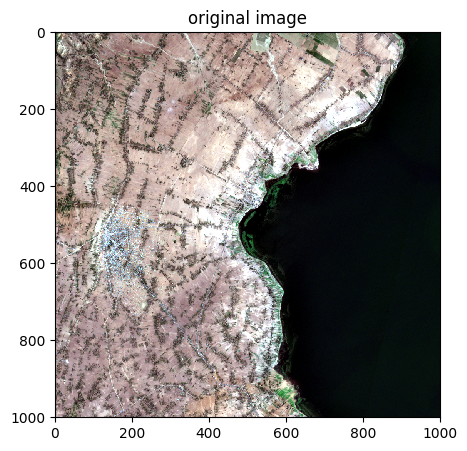

After crop
- Size of the image:
   - Rows (height): 150
   - Cols (width): 200
   - Bands: 12
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.07488251, 38.36338418)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12}

--- History of modifications---
[2025-06-04 15:23:49] - Read image ./data/demo/sentinel.tif
[2025-06-04 15:23:50] - Cropped from shape (1000, 1000) to (150, 200) using pixel coordinates rows 50:200, cols 100:300
	 Cropped image saved to: ./data/results/crop/crop_pixel1.tif




<Figure size 640x480 with 0 Axes>

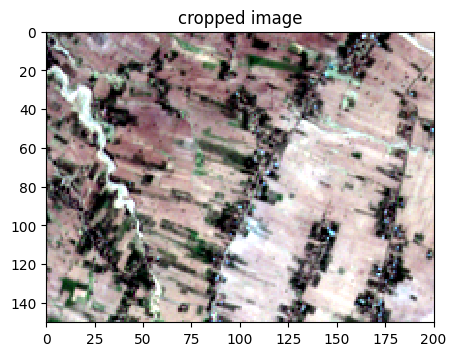

In [8]:
deb_row=50
deb_col=100
end_row = 200
end_col=300
#### 2) a) With respect to pixel coordinates

print('Before crop')
image.info()
image.colorcomp([4,3,2],title='original image',extent="pixel")
image.crop(deb_row,end_row,deb_col,end_col,dest_name='./data/results/crop/crop_pixel1.tif', inplace=True)
print('After crop')
image.info()
image.colorcomp([4,3,2],title='cropped image',extent="pixel")


### 3) b) With respect to lat/lon coordinates


Note : we need to reload the image since we modified it before (with `inplace=True`)

In [9]:
image=rastereasy.Geoimage(name_im)
image.info()


- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 12
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12}




Get information of lon / lat bos

In [10]:
print('latitude - longitude of top left corner', image.pixel2latlon(0,0))
print('latitude - longitude of bottom right corner', image.pixel2latlon(image.shape[0],image.shape[1]))
# Transform the coordinates pixels in lat,lon
deb_row=50
deb_col=100
end_row = 200
end_col=300
lat1,lon1=image.pixel2latlon(deb_row,deb_col)
lat2,lon2=image.pixel2latlon(end_row,end_col)
print('lat,lon corresponding to (%d,%d) : (%f,%f)'%(deb_row,deb_col,lat1,lon1))
print('lat,lon corresponding to (%d,%d) : (%f,%f)'%(end_row,end_col,lat2,lon2))


latitude - longitude of top left corner (7.086164175158828, 38.34525905140625)
latitude - longitude of bottom right corner (6.99582780410311, 38.4359177538106)
lat,lon corresponding to (50,100) : (7.081654,38.354320)
lat,lon corresponding to (200,300) : (7.068111,38.372448)


<Figure size 640x480 with 0 Axes>

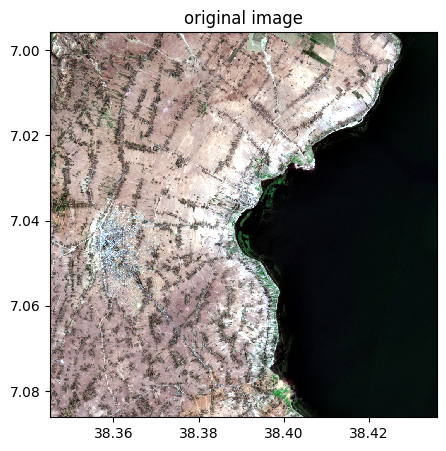

After crop
- Size of the image:
   - Rows (height): 150
   - Cols (width): 200
   - Bands: 12
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.07488251, 38.36338418)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12}




<Figure size 640x480 with 0 Axes>

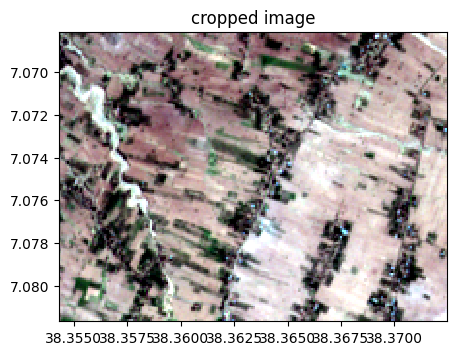

In [11]:

image.colorcomp([4,3,2],title='original image')
image.crop(lon1,lon2,lat1,lat2,pixel=False, inplace=True)
print('After crop')
image.info()
image.colorcomp([4,3,2],title='cropped image')

